In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

[*********************100%***********************]  1 of 1 completed


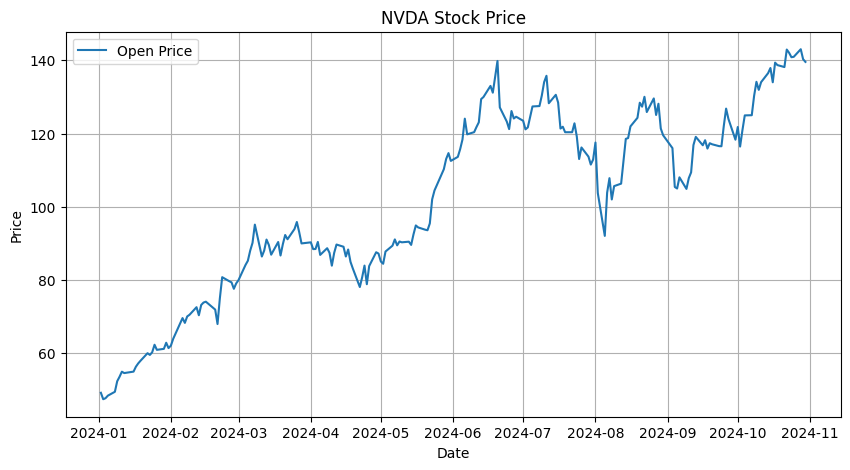

In [2]:
def plot_stock_data(stock_name, start_date, end_date):
    # Fetch stock data
    stock_data = yf.download(stock_name, start=start_date, end=end_date)
    
    # Reset the index to make 'Date' a column
    stock_data.reset_index(inplace=True)
    
    # Plot the stock data
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Open'], label='Open Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_name} Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_stock_data('NVDA', '2024-01-01', '2024-10-31')

2023-11-03


[*********************100%***********************]  1 of 1 completed


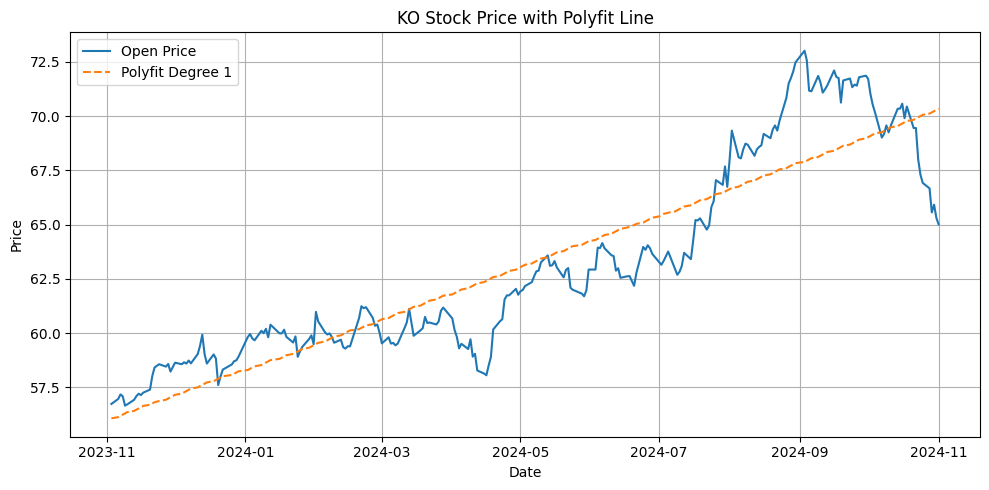

Last Stock Price: 65.01
Expected Stock Price: 70.34
Difference: 5.33


In [ ]:
def plot_polyfit_line(stock_name, start_date, end_date, start_poly, end_poly, degree=1, fixed_years=False, num_year=1):
    if fixed_years:
        # Calculate the start date based on the number of years to look back
        start_date = (datetime.now() - timedelta(days=num_year*365)).strftime('%Y-%m-%d')
        end_date = datetime.now().strftime('%Y-%m-%d')
    
    # Fetch stock data
    stock_data = yf.download(stock_name, start=start_date, end=end_date)
    stock_data_poly = yf.download(stock_name, start=start_poly, end=end_poly)
    
    # Reset the index to make 'Date' a column
    stock_data.reset_index(inplace=True)
    stock_data_poly.reset_index(inplace=True)

    # Extract the date and close price
    dates = stock_data['Date']
    dates_poly = stock_data_poly['Date']
    close_prices = stock_data['Close']
    close_prices_poly = stock_data_poly['Close']
    
    # Convert dates to numerical values for polyfit
    # dates_numeric = np.arange(len(dates))
    dates_numeric_poly = np.arrange(len(dates_poly))
    
    # Perform polynomial fit
    # p = np.polyfit(dates_numeric, close_prices, degree)
    p_poly = np.polyfit(dates_numeric_poly, close_prices_poly, degree)
    
    # Evaluate the polynomial
    # polyfit_values = np.polyval(p, dates_numeric)
    polyfit_values_poly = np.polyval(p_poly, dates_numeric_poly)

    
    # Plot the stock data and the polyfit line
    plt.figure(figsize=(10, 5))
    plt.plot(dates, close_prices, label='Open Price')
    # plt.plot(dates, polyfit_values, label=f'Polyfit Degree {degree}', linestyle='--')
    plt.plot(dates, polyfit_values_poly, label=f'Polyfit Degree {degree}', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_name} Stock Price with Polyfit Line')
    plt.legend()
    plt.grid(True)
    plt.xticks()
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

    # Get the last values of stock prices and polyfit values
    last_stock_value = float(close_prices.iloc[-1].values[0])  # Use values[0] to ensure correct conversion
    # last_polyfit_value = float(polyfit_values[-1])  # Convert to float
    last_polyfit_value = float(polyfit_values_poly[-1])  # Convert to float


    # Calculate the difference
    difference = last_polyfit_value - last_stock_value

    # Print out the last values and the difference
    print(f'Last Stock Price: {last_stock_value:.2f}')
    print(f'Expected Stock Price: {last_polyfit_value:.2f}')
    print(f'Difference: {difference:.2f}')

# Example usage
plot_polyfit_line('KO', '2024-08-01', '2024-10-31', '2024-01-01', '2024-7-31', degree=1, fixed_years=True, num_year=1) 